In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm
import binascii


In [3]:
df_all = pd.read_csv(
    "C:\\Users\Philipp\OneDrive - UT Cloud\Data_literacy_mensa\Mensa_data_combined\\wednesday100124.csv")
df_all

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid
0,1,"Jan 10, 2024 10:01:07.758711000 Mitteleuropäis...",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,55546775657374
1,2,"Jan 10, 2024 10:01:07.784807000 Mitteleuropäis...",NaN,NaN,802.11,39,NaN
2,3,"Jan 10, 2024 10:01:07.794917000 Mitteleuropäis...",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,NaN
3,4,"Jan 10, 2024 10:01:07.795010000 Mitteleuropäis...",NaN,NaN,802.11,29,NaN
4,5,"Jan 10, 2024 10:01:07.795542000 Mitteleuropäis...",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,4775657374
...,...,...,...,...,...,...,...
15338369,15338370,"Jan 10, 2024 12:59:52.317226000 Mitteleuropäis...",NaN,NaN,802.11,35,NaN
15338370,15338371,"Jan 10, 2024 12:59:52.317274000 Mitteleuropäis...",NaN,NaN,802.11,29,NaN
15338371,15338372,"Jan 10, 2024 12:59:52.317323000 Mitteleuropäis...",NaN,NaN,802.11,33,NaN
15338372,15338373,"Jan 10, 2024 12:59:52.317375000 Mitteleuropäis...",NaN,NaN,802.11,47,NaN


<Axes: ylabel='Density'>

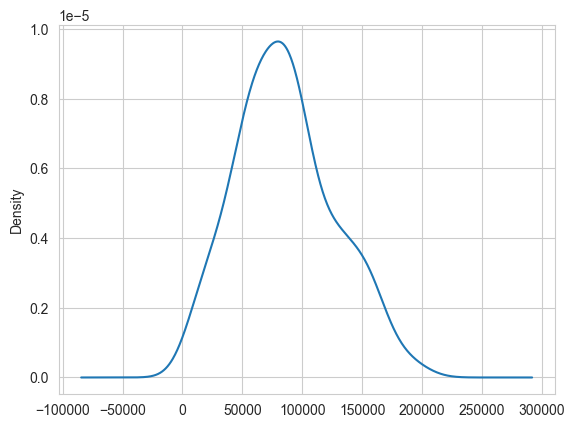

In [4]:
df_all["frame.time"] = df_all["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df_all["frame.time"].value_counts().sort_index().plot(kind='density')


In [5]:
df_all['date-time'] = pd.to_datetime(df_all['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET'),
                                     format='%b %d, %Y %H:%M %Z')
df_all['hour:minute'] = df_all['date-time'].dt.strftime('%H:%M')
df_all

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid,date-time,hour:minute
0,1,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,298,55546775657374,2024-01-10 10:01:00+01:00,10:01
1,2,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",NaN,NaN,802.11,39,NaN,2024-01-10 10:01:00+01:00,10:01
2,3,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,43,NaN,2024-01-10 10:01:00+01:00,10:01
3,4,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",NaN,NaN,802.11,29,NaN,2024-01-10 10:01:00+01:00,10:01
4,5,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286,4775657374,2024-01-10 10:01:00+01:00,10:01
...,...,...,...,...,...,...,...,...,...
15338369,15338370,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,35,NaN,2024-01-10 12:59:00+01:00,12:59
15338370,15338371,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,29,NaN,2024-01-10 12:59:00+01:00,12:59
15338371,15338372,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,33,NaN,2024-01-10 12:59:00+01:00,12:59
15338372,15338373,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,47,NaN,2024-01-10 12:59:00+01:00,12:59


In [6]:
print((df_all["wlan.ssid"].value_counts()).count())
#df["wlan.sa"].value_counts()
df = df_all.loc[df_all["wlan.ssid"] == "656475726f616d"]

1454


In [81]:
# This gives us the count of entries per ssid
unique_counts = df_all.groupby("wlan.ssid")
ssids_counts = df_all["wlan.ssid"].value_counts().reset_index()
ssids_counts.columns = ["SSID", "Count"]
ssids_counts = ssids_counts.to_numpy()

In [83]:
ssids_counts = df_all["wlan.ssid"].value_counts().reset_index()
ssids_counts.columns = ["wlan.ssid", "count"]

# Step 2: Group by WLAN SSID and count the number of unique entries in wlan.sa
unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]

# Step 3: Merge the two DataFrames on "wlan.ssid"
result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
result = result.to_numpy()

In [84]:
# Conversion from hexadecimal to "human"
def hex_to_str(hex_str):
    if len(hex_str) % 2 != 0:
        return hex_str
    bytes_obj = binascii.unhexlify(hex_str)
    return bytes_obj.decode('latin-1')


vec_func = np.vectorize(hex_to_str)

result[:,0] = vec_func(result[:,0])

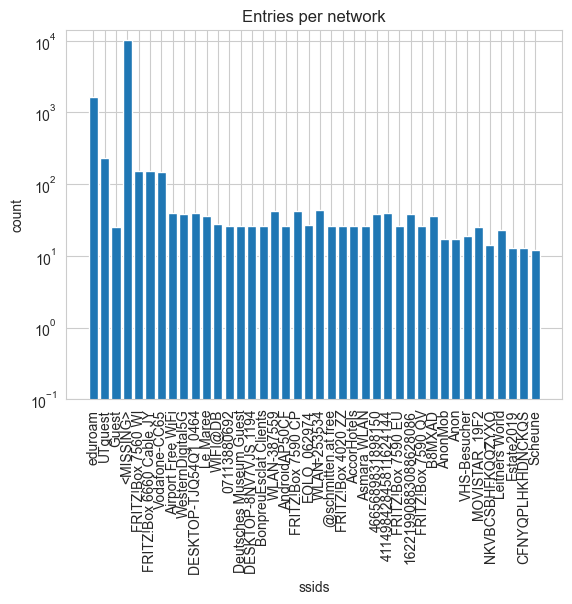

In [86]:
# This displays the first 40 ssids and their number of entries

names = result[:40, 0]
value = result[:40, 2].astype(int)

plt.bar(names, value)
plt.xlabel("ssids")
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.yscale("log")
plt.ylim(bottom=0.1)
plt.title("Entries per network")
plt.show()

In [8]:
df_first = df.drop_duplicates(subset='wlan.sa', keep='first')
df_first.tail()
df_first["wlan.sa"].nunique()

1662

Text(0.5, 1.0, 'first seen Count vs Time')

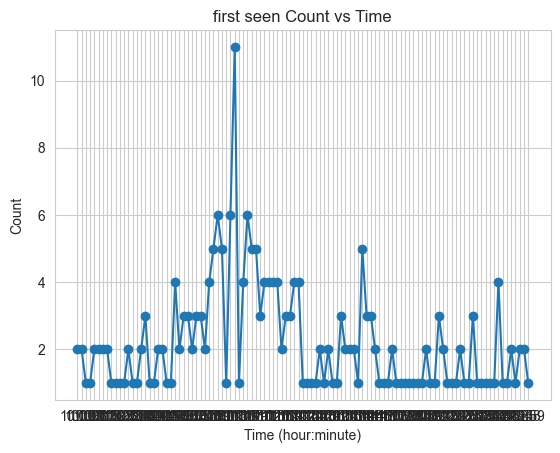

In [9]:
per_min_new = pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [10]:
df_last = df.loc[df["wlan.ssid"] == "656475726f616d"]
df_last = df_last.drop_duplicates(subset='wlan.sa', keep='last')
df_last.tail()


,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid,date-time,hour:minute


Text(0.5, 1.0, 'Last seen Count vs Time')

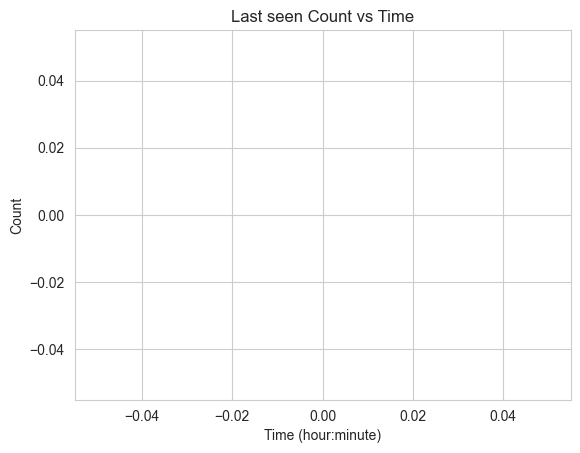

In [11]:
per_min_last = pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

Text(0.5, 1.0, 'Count vs Time')

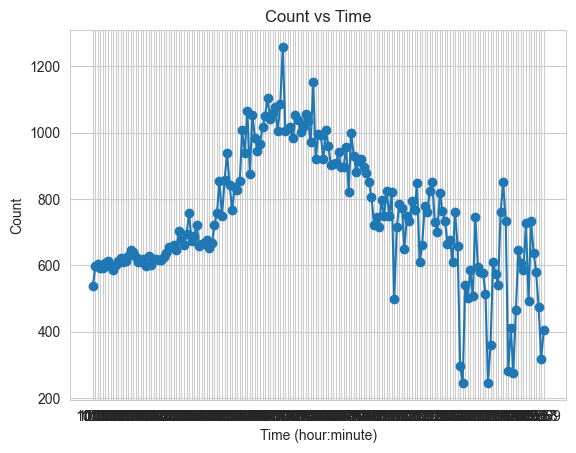

In [12]:
per_min = pd.DataFrame(df["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

C:\Users\Philipp\AppData\Local\Temp\ipykernel_2308\1105561439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)


Text(0.5, 1.0, 'Count vs Time')

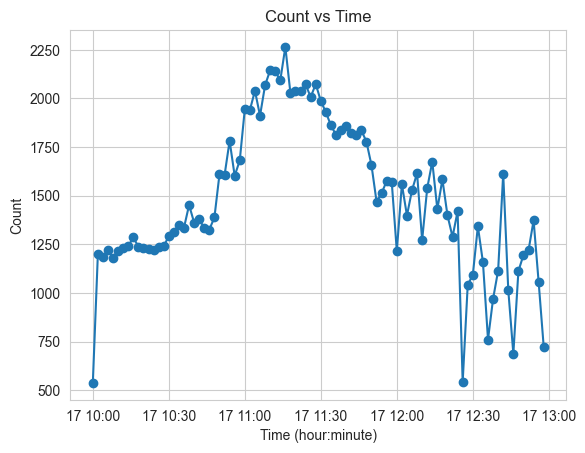

In [13]:
dtt = pd.DataFrame({'hour:minute': per_min.index.tolist(), 'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('2T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

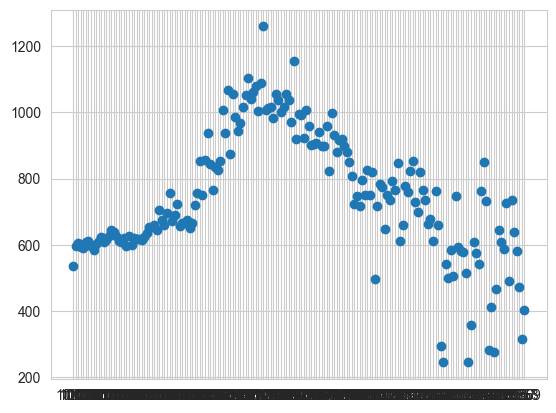

In [14]:
ax = plt.plot_date(per_min.index, per_min["count"], xdate=True)

In [15]:
from dateutil import parser
from datetime import datetime
import re